## EXERCIZE

- Price is a target, no need to do a scaling process.
- While Distance, Car, Landsize, Rooms, Bedroom2, Bathroom are the feature we need to scale.
- The NaN Values (Although not the best practices) are to be dropped after become the df_test (after features are selected).
- Use a proper Scaler that fit with data conditions. Check the outliers first.
- Save into new dataframe that also consist the target (Price) and scaled Distance, Car, Landsize, Rooms, Bedroom2, Bathroom features. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler

To start the process, first we have to load our dataset, then drop all the Missing Values(NaN) as instructed above.

In [2]:
df = pd.read_csv('melb_data.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [3]:
df = df.dropna()
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0
6,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,2.0,0.0,245.0,210.0,1910.0,Yarra,-37.8024,144.9993,Northern Metropolitan,4019.0
7,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,1.0,2.0,256.0,107.0,1890.0,Yarra,-37.8060,144.9954,Northern Metropolitan,4019.0


Here, we start to put the data to a new dataframe and call it **df_test** as instructed above. This dataframe are consist of features as mentioned above (Price, Distance, Car, Landsize, Rooms, Bedroom2, Bathroom).

In [4]:
df_test = df[['Price', 'Distance', 'Car', 'Landsize', 'Rooms', 'Bedroom2', 'Bathroom']]
df_test.head()

,Price,Distance,Car,Landsize,Rooms,Bedroom2,Bathroom
1,1035000.0,2.5,0.0,156.0,2,2.0,1.0
2,1465000.0,2.5,0.0,134.0,3,3.0,2.0
4,1600000.0,2.5,2.0,120.0,4,3.0,1.0
6,1876000.0,2.5,0.0,245.0,3,4.0,2.0
7,1636000.0,2.5,2.0,256.0,2,2.0,1.0


Now to the next step, we have to scan the outliers within the data. This is to see which scaler method fit to use in the data.

In [5]:
def find_outlier(yourList):
    
    Q2 = np.quantile(yourList, .50)
    Q1 = np.quantile(yourList, .25)
    Q3 = np.quantile(yourList, .75)

    IQR = (Q3 - Q1) * 1.5
    batas_bawah = Q1 - IQR
    batas_atas = Q3 + IQR
    
    outlier = ''
    
    for i in range(len(yourList)):
        if yourList[i] > batas_atas:
            outlier = outlier + str(yourList[i]) + ', '
        if yourList[i] < batas_bawah:
            outlier = outlier + str(yourList[i]) + ', '

    print(outlier)
    print('\n'+ f'Outliers : {len(outlier)}') 

In [6]:
find_outlier(list(df_test['Distance']))

23.2, 23.0, 23.0, 24.7, 25.9, 36.9, 38.0, 45.9, 45.2, 25.2, 31.7, 31.7, 25.9, 23.5, 35.4, 31.7, 31.7, 27.2, 23.2, 23.2, 23.2, 27.0, 25.0, 25.0, 31.2, 31.2, 27.0, 24.7, 24.7, 24.7, 22.2, 28.8, 38.0, 36.9, 25.2, 29.8, 31.7, 26.5, 26.5, 35.4, 31.7, 23.2, 23.2, 23.2, 35.2, 34.9, 23.0, 22.2, 24.8, 45.9, 32.3, 31.7, 26.5, 23.5, 34.7, 31.7, 39.8, 35.2, 27.0, 23.0, 22.2, 22.2, 38.0, 31.7, 31.6, 22.7, 47.4, 23.5, 34.7, 23.2, 35.2, 34.9, 27.1, 23.0, 23.0, 23.0, 22.2, 27.0, 27.0, 24.8, 25.2, 23.3, 31.7, 29.8, 31.7, 22.7, 22.7, 22.7, 35.4, 31.7, 25.5, 23.2, 35.2, 35.2, 25.0, 25.0, 34.9, 23.0, 23.0, 23.0, 23.0, 24.7, 22.2, 27.0, 24.8, 38.0, 38.0, 33.3, 31.7, 31.7, 28.8, 26.5, 23.5, 23.5, 35.4, 31.7, 31.7, 27.0, 27.2, 34.9, 23.0, 23.0, 27.7, 45.9, 26.1, 31.7, 31.7, 25.9, 22.2, 27.2, 23.2, 25.0, 25.0, 31.2, 34.9, 23.0, 22.2, 22.2, 22.2, 28.5, 24.8, 24.8, 38.0, 38.0, 45.9, 25.2, 29.8, 29.8, 34.1, 47.3, 23.5, 23.5, 35.4, 35.4, 35.4, 25.5, 39.0, 27.0, 24.7, 24.7, 28.8, 27.0, 24.8, 31.7, 41.0, 29.8, 22.7

In [7]:
find_outlier(list(df_test['Car']))

6.0, 5.0, 4.0, 4.0, 4.0, 6.0, 4.0, 6.0, 4.0, 4.0, 4.0, 4.0, 5.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 7.0, 4.0, 4.0, 4.0, 4.0, 4.0, 5.0, 4.0, 4.0, 4.0, 5.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 5.0, 4.0, 4.0, 4.0, 6.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 6.0, 6.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 8.0, 4.0, 5.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 8.0, 4.0, 5.0, 4.0, 6.0, 4.0, 4.0, 5.0, 4.0, 4.0, 4.0, 6.0, 4.0, 4.0, 7.0, 4.0, 5.0, 4.0, 4.0, 4.0, 6.0, 4.0, 5.0, 4.0, 4.0, 4.0, 4.0, 4.0, 5.0, 6.0, 6.0, 4.0, 4.0, 4.0, 6.0, 6.0, 4.0, 4.0, 5.0, 4.0, 4.0, 5.0, 4.0, 4.0, 4.0, 4.0, 4.0, 5.0, 4.0, 4.0, 4.0, 4.0, 4.0, 7.0, 5.0, 6.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 5.0, 7.0, 4.0, 4.0, 4.0, 4.0, 7.0, 6.0, 4.0, 5.0, 5.0, 4.0, 4.0, 4.0, 5.0, 4.0, 4.0, 4.0, 4.0, 4.0, 9.0, 4.0, 4.0, 4.0, 4.0, 5.0, 5.0, 5.0, 4.0, 6.0, 4.0, 4.0, 10.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0,

In [8]:
find_outlier(list(df_test['Landsize']))

2113.0, 1491.0, 2471.0, 1957.0, 1472.0, 2051.0, 1364.0, 1572.0, 1561.0, 4668.0, 4676.0, 2120.0, 2886.0, 3701.0, 1484.0, 1764.0, 1966.0, 1658.0, 2782.0, 4332.0, 2794.0, 1783.0, 1485.0, 1504.0, 3977.0, 3448.0, 3957.0, 2136.0, 1353.0, 1972.0, 15100.0, 5661.0, 3967.0, 1396.0, 4977.0, 3014.0, 3014.0, 1414.0, 4051.0, 2187.0, 1981.0, 1660.0, 2522.0, 1588.0, 2300.0, 2488.0, 2401.0, 6866.0, 5042.0, 1768.0, 1958.0, 8216.0, 1485.0, 4679.0, 8223.0, 1725.0, 2571.0, 2740.0, 7455.0, 8223.0, 3516.0, 2122.0, 2955.0, 5530.0, 1669.0, 2335.0, 2879.0, 1409.0, 1458.0, 1659.0, 1452.0, 1555.0, 2276.0, 2064.0, 1473.0, 5289.0, 5289.0, 2347.0, 1784.0, 1647.0, 2079.0, 3747.0, 15900.0, 2679.0, 6494.0, 2787.0, 2166.0, 7159.0, 21715.0, 2842.0, 8220.0, 7455.0, 5467.0, 2920.0, 2701.0, 6261.0, 2592.0, 1816.0, 1678.0, 1993.0, 8140.0, 5022.0, 9838.0, 1540.0, 3826.0, 1764.0, 1750.0, 1396.0, 2267.0, 37000.0, 2431.0, 1472.0, 1646.0, 2379.0, 1590.0, 1690.0, 6996.0, 2135.0, 8888.0, 1501.0, 2385.0, 4221.0, 1459.0, 1717.0, 4977

In [9]:
find_outlier(list(df_test['Rooms']))

8, 8, 8, 

Outliers : 9


In [10]:
find_outlier(list(df_test['Bedroom2']))

6.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 6.0, 9.0, 5.0, 6.0, 5.0, 5.0, 5.0, 6.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 6.0, 5.0, 5.0, 0.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 7.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 6.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 8.0, 5.0, 0.0, 5.0, 5.0, 5.0, 5.0, 5.0, 6.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 6.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 6.0, 6.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 6.0, 5.0, 5.0, 9.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 0.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 0.0, 9.0, 5.0, 5.0, 5.0, 6.0, 5.0, 5.0, 5.0, 5.0, 6.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 6.0, 5.0, 5.0, 5.0, 6.0, 5.0, 5.0, 6.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 

In [11]:
find_outlier(list(df_test['Bathroom']))

4.0, 7.0, 5.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 5.0, 4.0, 4.0, 4.0, 4.0, 5.0, 4.0, 5.0, 4.0, 4.0, 4.0, 4.0, 5.0, 4.0, 5.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 6.0, 4.0, 4.0, 5.0, 4.0, 4.0, 4.0, 4.0, 8.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 6.0, 4.0, 4.0, 4.0, 5.0, 4.0, 5.0, 4.0, 4.0, 4.0, 4.0, 4.0, 5.0, 4.0, 4.0, 4.0, 4.0, 5.0, 4.0, 4.0, 4.0, 5.0, 4.0, 6.0, 4.0, 5.0, 4.0, 5.0, 4.0, 4.0, 4.0, 5.0, 

Outliers : 420


From above data, we can see that the **find_outlier** function are used to return the outliers. And below are the outliers visualized using boxplot.

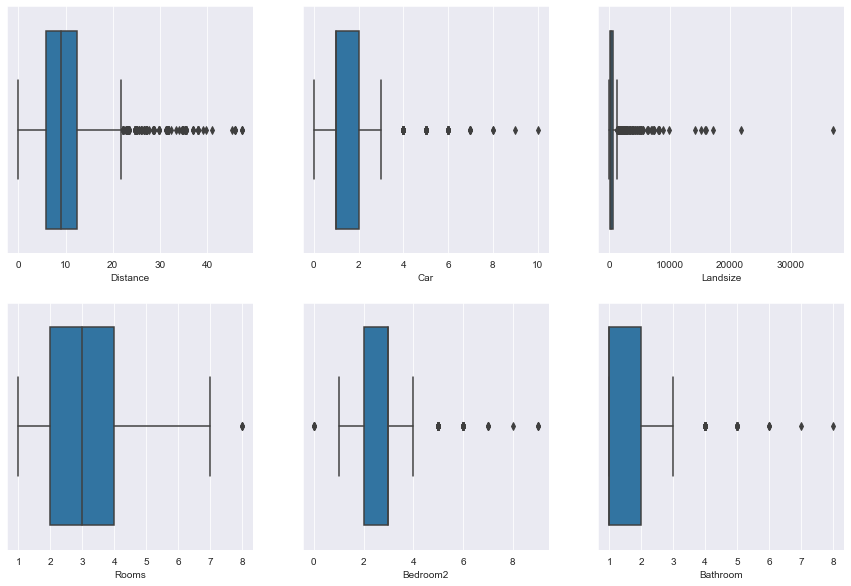

In [12]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(2,3, figsize = (15,10))
sns.boxplot(df_test['Distance'], ax=ax[0][0])
sns.boxplot(df_test['Car'], ax=ax[0][1])
sns.boxplot(df_test['Landsize'], ax=ax[0][2])
sns.boxplot(df_test['Rooms'], ax=ax[1][0])
sns.boxplot(df_test['Bedroom2'], ax=ax[1][1])
sns.boxplot(df_test['Bathroom'], ax=ax[1][2])

From above test & boxplots, we can see that almost all of the data have many outliers, thus for a more safe approach. I will use the **Robust Scaler** method, since the base theory of this method is the IQR, thus this is the best method for handling & scaling data with many outliers. As a final step, we apply the robust scaled data into **df_ready** to finish the whole process.

In [13]:
df_ready = df_test.copy()

In [14]:
df_ready['Distance Robust'] = RobustScaler().fit_transform(df_test[['Distance']])
df_ready['Car Robust'] = RobustScaler().fit_transform(df_test[['Car']])
df_ready['Landsize Robust'] = RobustScaler().fit_transform(df_test[['Landsize']])
df_ready['Rooms Robust'] = RobustScaler().fit_transform(df_test[['Rooms']])
df_ready['Bedroom2 Robust'] = RobustScaler().fit_transform(df_test[['Bedroom2']])
df_ready['Bathroom Robust'] = RobustScaler().fit_transform(df_test[['Bathroom']])

In [24]:
for i in df_test:
    print(df_test[i])

1        1035000.0
2        1465000.0
4        1600000.0
6        1876000.0
7        1636000.0
           ...    
12205     601000.0
12206    1050000.0
12207     385000.0
12209     560000.0
12212    2450000.0
Name: Price, Length: 6196, dtype: float64
1         2.5
2         2.5
4         2.5
6         2.5
7         2.5
         ... 
12205    35.5
12206     6.8
12207     6.8
12209     4.6
12212     6.3
Name: Distance, Length: 6196, dtype: float64
1        0.0
2        0.0
4        2.0
6        0.0
7        2.0
        ... 
12205    1.0
12206    0.0
12207    1.0
12209    1.0
12212    2.0
Name: Car, Length: 6196, dtype: float64
1         156.0
2         134.0
4         120.0
6         245.0
7         256.0
          ...  
12205     972.0
12206     179.0
12207       0.0
12209       0.0
12212    1087.0
Name: Landsize, Length: 6196, dtype: float64
1        2
2        3
4        4
6        3
7        2
        ..
12205    3
12206    3
12207    1
12209    2
12212    6
Name: Rooms, Length: 6196

In [15]:
df_ready = df_ready.drop(['Distance', 'Car', 'Landsize', 'Rooms', 'Bedroom2', 'Bathroom'], axis=1)

In [16]:
df_ready.head()

,Price,Distance Robust,Car Robust,Landsize Robust,Rooms Robust,Bedroom2 Robust,Bathroom Robust
1,1035000.0,-1.0,-1.0,-0.455882,-0.5,-1.0,0.0
2,1465000.0,-1.0,-1.0,-0.502101,0.0,0.0,1.0
4,1600000.0,-1.0,1.0,-0.531513,0.5,0.0,0.0
6,1876000.0,-1.0,-1.0,-0.268908,0.0,1.0,1.0
7,1636000.0,-1.0,1.0,-0.245798,-0.5,-1.0,0.0


Although we've finished the process. Let's try to visualize it to see the differences.

In [17]:
df_test.head()

,Price,Distance,Car,Landsize,Rooms,Bedroom2,Bathroom
1,1035000.0,2.5,0.0,156.0,2,2.0,1.0
2,1465000.0,2.5,0.0,134.0,3,3.0,2.0
4,1600000.0,2.5,2.0,120.0,4,3.0,1.0
6,1876000.0,2.5,0.0,245.0,3,4.0,2.0
7,1636000.0,2.5,2.0,256.0,2,2.0,1.0


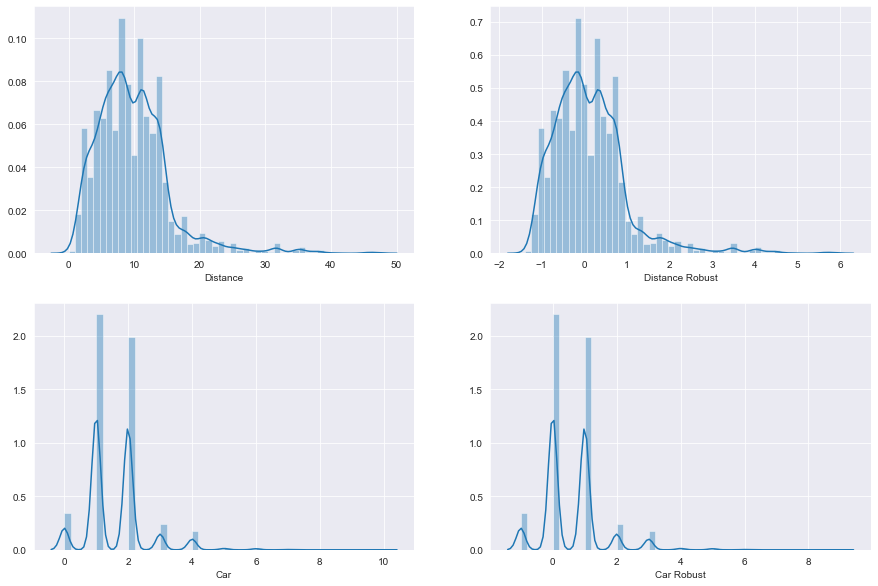

In [18]:
fig, ax = plt.subplots(2,2, figsize = (15,10))
sns.distplot(df_test['Distance'], ax = ax[0][0])
sns.distplot(df_ready['Distance Robust'], ax = ax[0][1])
sns.distplot(df_test['Car'], ax = ax[1][0])
sns.distplot(df_ready['Car Robust'], ax = ax[1][1])

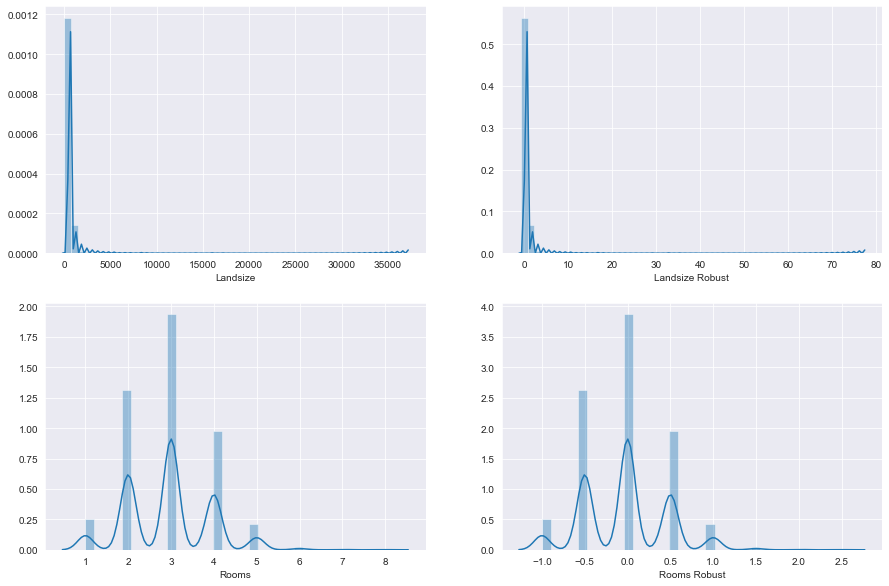

In [19]:
fig, ax = plt.subplots(2,2, figsize = (15,10))
sns.distplot(df_test['Landsize'], ax = ax[0][0])
sns.distplot(df_ready['Landsize Robust'], ax = ax[0][1])
sns.distplot(df_test['Rooms'], ax = ax[1][0])
sns.distplot(df_ready['Rooms Robust'], ax = ax[1][1])

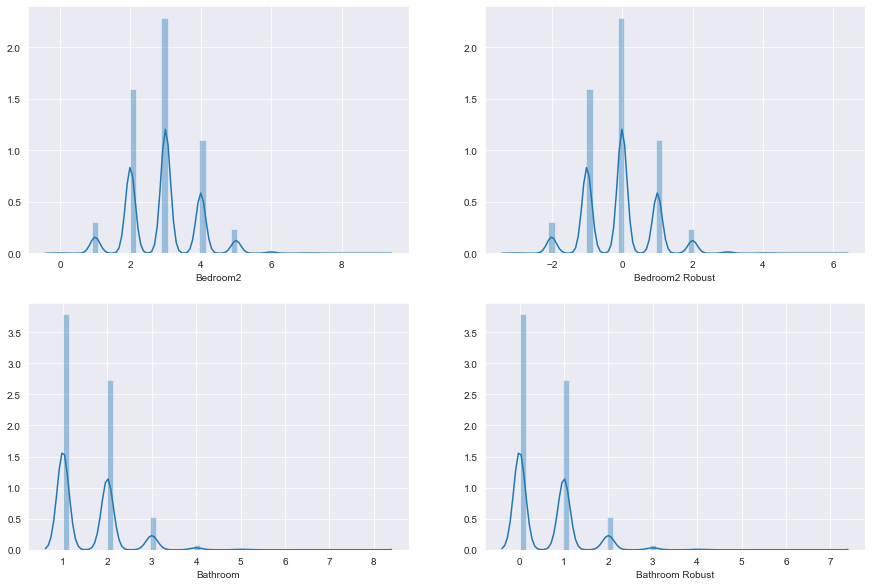

In [20]:
fig, ax = plt.subplots(2,2, figsize = (15,10))
sns.distplot(df_test['Bedroom2'], ax = ax[0][0])
sns.distplot(df_ready['Bedroom2 Robust'], ax = ax[0][1])
sns.distplot(df_test['Bathroom'], ax = ax[1][0])
sns.distplot(df_ready['Bathroom Robust'], ax = ax[1][1])

From above plots we can see that although there's not much of a differences on first glance, but if we examine the plots on the right side properly, we can see that we've succesfully scaled the data.